# Clean Anomalies in Saildrone Salinity Data

#### Configure Saildrone Dataset Below

In [24]:
ddir = '~/shared/users/mgarciareyes/saildrone_data/'
fn = 'saildrone_west_coast_survey_2019_sd1044_JPLv5.0_8dy_20210613norep_20210613_20211116.nc'

In [25]:
#import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings
warnings.simplefilter('ignore') 

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr

In [ ]:
#open .nc file with Saildrone Data
sail = xr.open_dataset(ddir + fn) 
sail.close()

#copy data for calculations versus graphing
sail_raw = sail.copy()

sail

<xarray.Dataset>
Dimensions:                       (time: 145)
Coordinates:
    trajectory                    float32 ...
  * time                          (time) datetime64[ns] 2019-07-22T01:16:30 ....
    ob                            (time) int64 ...
Data variables: (12/41)
    lat                           (time) float64 ...
    lon                           (time) float64 ...
    SOG_MEAN                      (time) float64 ...
    COG_MEAN                      (time) float64 ...
    HDG_MEAN                      (time) float64 ...
    ROLL_MEAN                     (time) float64 ...
    ...                            ...
    sat_lon                       (time) float64 ...
    dist_land                     (time) float64 ...
    analysed_sst                  (time) float64 ...
    analysis_error                (time) float64 ...
    mask                          (time) float64 ...
    sea_ice_fraction              (time) float64 ...
Attributes: (12/45)
    area:                      Pacific Ocean
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, ACDD-1.3, COARDS
    creator_email:             support@saildrone.com
    creator_name:              Saildrone
    ...                        ...
    time_coverage_end:         2019-09-16T19:57:00Z
    time_coverage_resolution:  PT1M
    time_coverage_start:       2019-06-18T00:00:00Z
    title:                     Saildrone West Coast Survey 2019
    Westernmost_Easting:       -125.970752
    vehicle_id:                sd1044

In [29]:
#### Filter Out Nonreal Data (+9999)

In [34]:
def filterSAL(min, max):
    if (max < min):
        return False
    sail['SAL_CTD_MEAN']=sail.SAL_CTD_MEAN.where(sail.SAL_CTD_MEAN>min, np.nan)
    sail['SAL_CTD_MEAN']=sail.SAL_CTD_MEAN.where(sail.SAL_CTD_MEAN<max, np.nan)
    return True

In [38]:
def drawSAL():    
    #create plot 
    plt.scatter(x = sail['time'].dt.date, y = sail['SAL_CTD_MEAN']) #seaborn has built in confidence intervals
    # make temp/sal plot
    #add labels
    plt.xlabel('Time')
    plt.ylabel('Salinity (PPU)')

    plt.grid(zorder=0, alpha=0.5)
    plt.show()

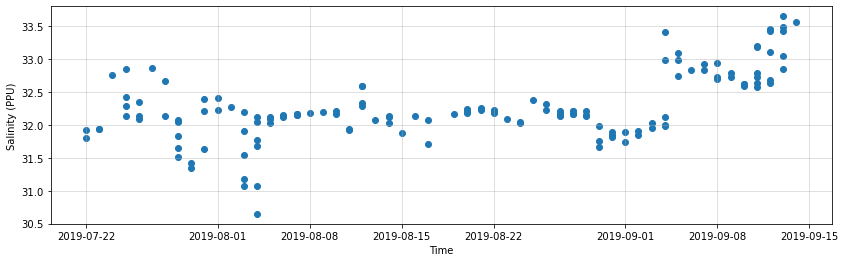

In [40]:
filterSAL(0, 9999)
plt.figure(figsize = (14,4))
drawSAL()

#### Set Threshold Parameters (Leave Blank if None)

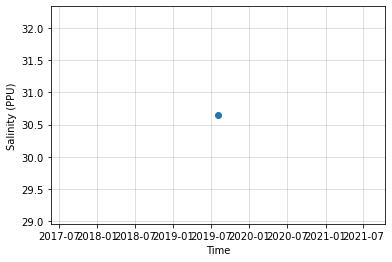

In [37]:
min_thresh = 30
max_thresh = 35
if (min_thresh & max_thresh):
    filterSAL(min_thresh, max_thresh)
drawSAL()

#### Report Final (Cleaned) Dataset

In [45]:
sail

<xarray.Dataset>
Dimensions:                       (time: 145)
Coordinates:
    trajectory                    float32 1.044e+03
  * time                          (time) datetime64[ns] 2019-07-22T01:16:30 ....
    ob                            (time) int64 0 1 2 3 4 ... 140 141 142 143 144
Data variables: (12/41)
    lat                           (time) float64 43.81 43.73 ... 37.85 37.78
    lon                           (time) float64 -125.2 -125.1 ... -123.1 -122.9
    SOG_MEAN                      (time) float64 1.507 0.748 ... 1.051 1.237
    COG_MEAN                      (time) float64 172.1 175.5 ... 112.4 147.9
    HDG_MEAN                      (time) float64 171.3 195.3 ... 104.6 149.9
    ROLL_MEAN                     (time) float64 -0.1809 -0.3311 ... -1.067
    ...                            ...
    sat_lon                       (time) float64 -125.2 -125.1 ... -123.1 -122.9
    dist_land                     (time) float64 79.27 72.24 ... 23.09 11.74
    analysed_sst                  (time) float64 290.5 290.5 ... 287.4 287.6
    analysis_error                (time) float64 0.3732 0.37 0.38 ... 0.4 0.4
    mask                          (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    sea_ice_fraction              (time) float64 nan nan nan nan ... nan nan nan
Attributes: (12/45)
    area:                      Pacific Ocean
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, ACDD-1.3, COARDS
    creator_email:             support@saildrone.com
    creator_name:              Saildrone
    ...                        ...
    time_coverage_end:         2019-09-16T19:57:00Z
    time_coverage_resolution:  PT1M
    time_coverage_start:       2019-06-18T00:00:00Z
    title:                     Saildrone West Coast Survey 2019
    Westernmost_Easting:       -125.970752
    vehicle_id:                sd1044

# Optional: Compare data to Satellite